# Análise exploratória de dados

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [129]:
data = pd.read_csv('../data/processed/preprocessingTEC.csv')
data

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,3600,Evadidos,64095768,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,19.0,IFSUL,2019-07-01,Região Sul,"0<RFP<=0,5",Feminino,Matutino,RS,Campus Camaquã
1,3600,Concluintes,64094201,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.160,20.0,IFSUL,2019-08-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
2,3600,Concluintes,64094245,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,18.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
3,3600,Concluintes,64096104,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,19.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
4,3600,Concluintes,64095758,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.160,20.0,IFSUL,2019-03-01,Região Sul,"0,5<RFP<=1,0",Feminino,Matutino,RS,Campus Camaquã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166182,4025,Evadidos,72254964,parda,2017-02-22,2020-12-29,20 a 24 anos,1.120,20.0,IFPE,2021-12-30,Região Nordeste,Não declarada,Masculino,Vespertino,PE,Campus Recife
166183,3483,Concluintes,84665427,parda,2018-02-05,2020-12-22,15 a 19 anos,1.094,18.0,IFMA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,MA,Campus São João dos Patos
166184,3730,Concluintes,84431051,parda,2018-03-01,2020-12-18,15 a 19 anos,1.016,18.0,IFBA,2021-12-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Valença Tento
166185,3780,Concluintes,102544908,parda,2016-07-18,2020-07-17,20 a 24 anos,1.053,21.0,IFBA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Santo Amaro


In [130]:
data=data[data['Faixa Etária']!='S/I']
data=data[data['Turno']!='Não se aplica']
data=data[data['Sexo']!='S/I']
data=data[data['Idade']>10]

## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [131]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [132]:
data.select_dtypes(include='object')

,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,Evadidos,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-07-01,Região Sul,"0<RFP<=0,5",Feminino,Matutino,RS,Campus Camaquã
1,Concluintes,não declarada,2015-02-19,2019-02-19,20 a 24 anos,IFSUL,2019-08-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
2,Concluintes,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
3,Concluintes,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
4,Concluintes,não declarada,2015-02-19,2019-02-19,20 a 24 anos,IFSUL,2019-03-01,Região Sul,"0,5<RFP<=1,0",Feminino,Matutino,RS,Campus Camaquã
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166182,Evadidos,parda,2017-02-22,2020-12-29,20 a 24 anos,IFPE,2021-12-30,Região Nordeste,Não declarada,Masculino,Vespertino,PE,Campus Recife
166183,Concluintes,parda,2018-02-05,2020-12-22,15 a 19 anos,IFMA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,MA,Campus São João dos Patos
166184,Concluintes,parda,2018-03-01,2020-12-18,15 a 19 anos,IFBA,2021-12-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Valença Tento
166185,Concluintes,parda,2016-07-18,2020-07-17,20 a 24 anos,IFBA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Santo Amaro


In [133]:
data.columns

Index(['Carga Horária', 'Categoria da Situação', 'Código da Matrícula',
       'Cor/Raça', 'Data de Início do Ciclo', 'Data de Fim Previsto do Ciclo',
       'Faixa Etária', 'Fator Esforço Curso', 'Idade', 'Instituição',
       'Mês de Ocorrência da Situação', 'Região', 'Renda Familiar', 'Sexo',
       'Turno', 'UF', 'Unidade de Ensino'],
      dtype='object')

In [134]:
data ['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

In [135]:
categorica = data.select_dtypes(include='object')

In [136]:
numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [137]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,166140.000000,166140,1.661400e+05,166140,166140,166140,166140,166140.00000,166140.000000,166140,166140,166140,166140,166140,166140,166140,166140
unique,NaN,2,NaN,6,955,1184,11,NaN,NaN,51,508,5,7,2,4,27,552
top,NaN,Concluintes,NaN,parda,2018-02-05,2019-12-20,15 a 19 anos,NaN,NaN,IFRN,2019-12-01,Região Nordeste,Não declarada,Masculino,Integral,MG,Unidade Belo Horizonte
freq,NaN,114416,NaN,63709,12964,13732,130199,NaN,NaN,8730,25235,54353,61272,86364,91328,19061,1911
mean,3777.993096,NaN,7.719327e+07,NaN,NaN,NaN,NaN,1.15618,18.642278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,524.051297,NaN,1.095186e+07,NaN,NaN,NaN,NaN,0.10188,2.160952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,800.000000,NaN,3.410000e+02,NaN,NaN,NaN,NaN,1.00000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3467.000000,NaN,6.734609e+07,NaN,NaN,NaN,NaN,1.05300,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3743.000000,NaN,7.250303e+07,NaN,NaN,NaN,NaN,1.18300,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4040.000000,NaN,8.554955e+07,NaN,NaN,NaN,NaN,1.25000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
data ['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

##### Distribuição das variáveis qualitativas

In [139]:
sns.set_theme(style="whitegrid")

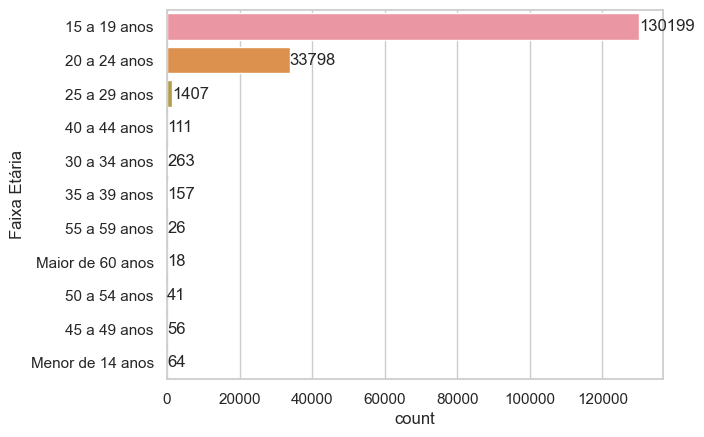

In [140]:
ax= sns.countplot(categorica,y='Faixa Etária')
ax.bar_label(ax.containers[0])
plt.show()

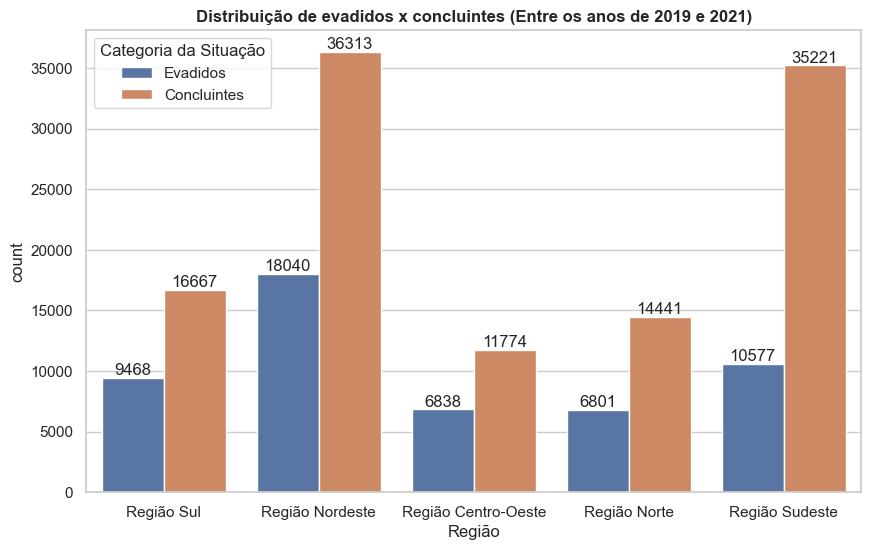

In [141]:
plt.figure(figsize=(10, 6))
ax= sns.countplot(categorica,x='Região',hue='Categoria da Situação')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

In [142]:
def show_bars(subplot_value, x_value, hue_value, dataset):
    plt.subplot(subplot_value)
    ax = sns.countplot(x = x_value, hue = hue_value, data = dataset,palette='plasma')
    # ax.set(xlabel = x_value, ylabel = 'Quantidade e Percentual')
    x_value = x_value.replace('_',' ')
    x_value = x_value.replace(x_value[0],x_value[0].upper())
    ax.set_xlabel(x_value, fontsize=15)
    ax.set_ylabel("Quantidade e Percentual", fontsize=15)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(True)
    #ax.spines['bottom'].set_visible(True)
    ax.legend(fontsize=15)
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    for bars in ax.containers:
        for x, p in enumerate(bars):
            total = sum(xgroup[x] for xgroup in all_heights) 
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(f'{p.get_height()}\n{percentage}', (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', va='bottom')
   

    x_ticks = [item.get_text() for item in ax.get_xticklabels()]
    if len(x_ticks[0]) > 10:
        ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(x_ticks, fontsize=12)

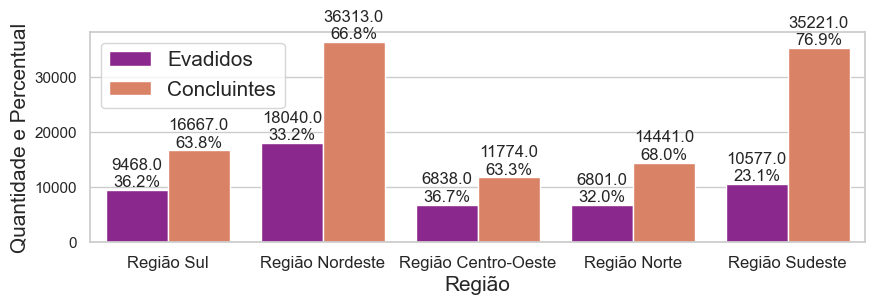

In [143]:
plt.figure(figsize=(10, 6))
show_bars(211, 'Região', 'Categoria da Situação', categorica)

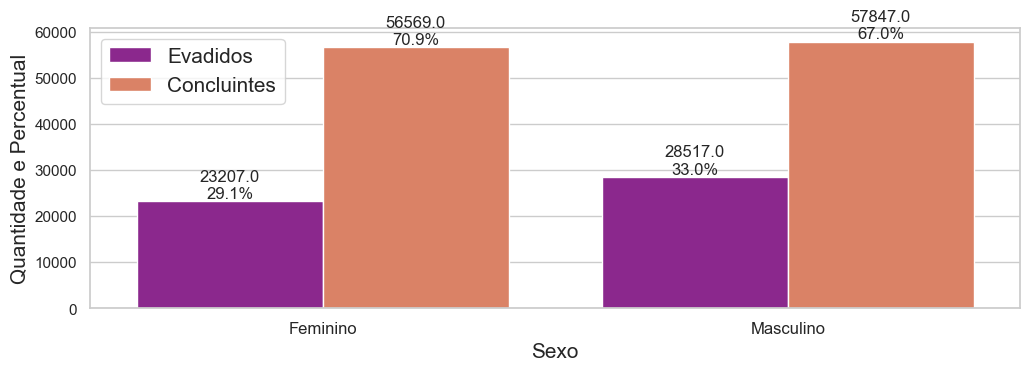

In [144]:
plt.figure(figsize=(12, 8))
show_bars(211, 'Sexo', 'Categoria da Situação', categorica)

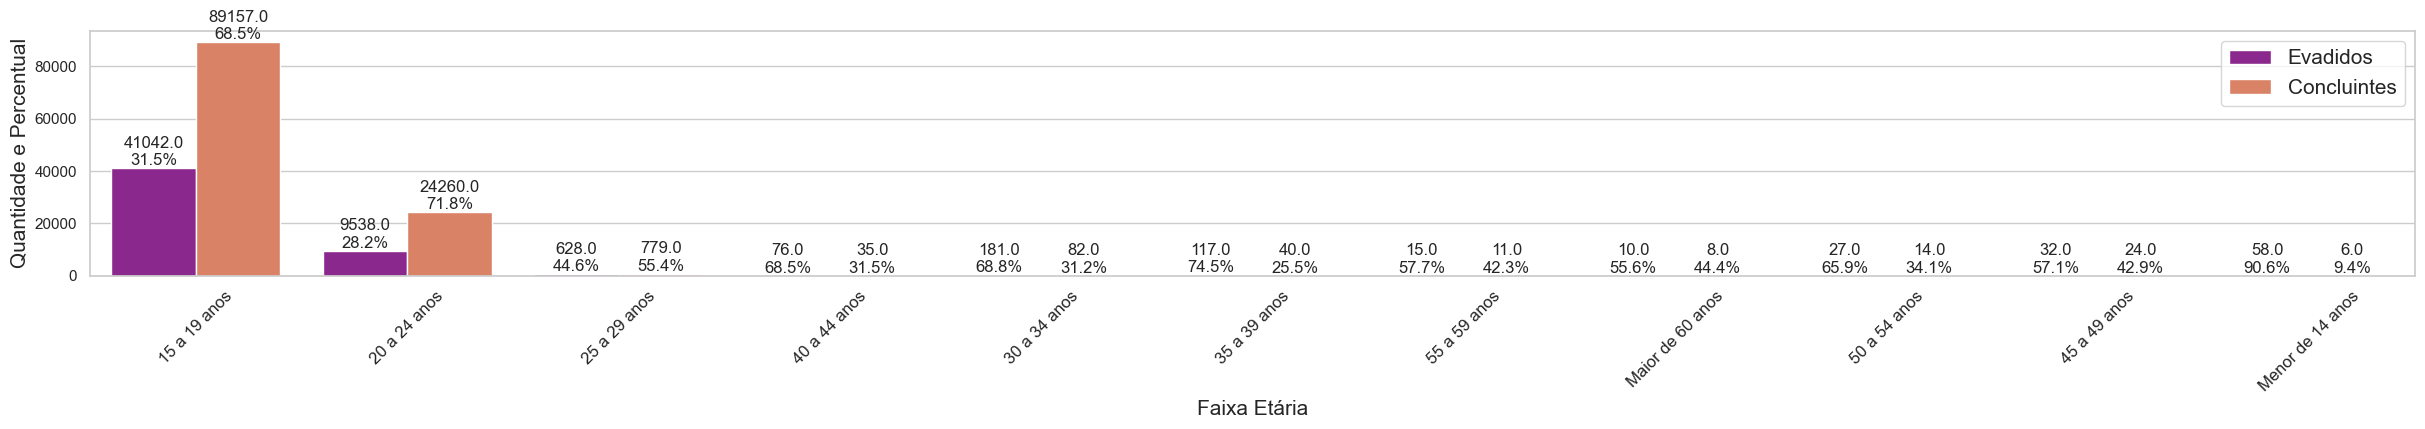

In [145]:
plt.figure(figsize=(30, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', categorica)

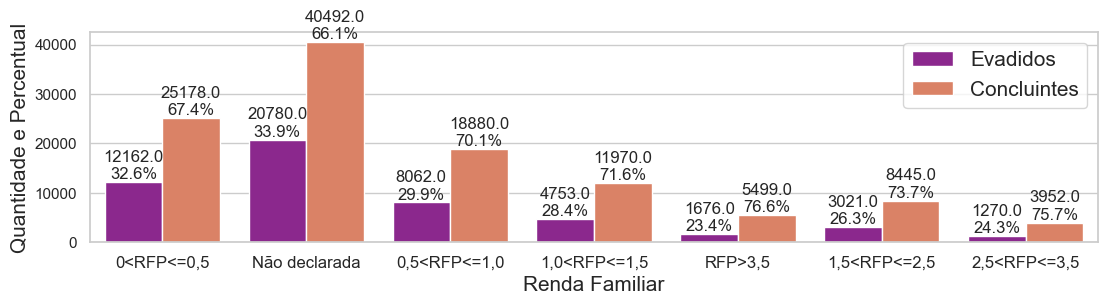

In [146]:
plt.figure(figsize=(13, 6))
show_bars(211, 'Renda Familiar', 'Categoria da Situação', categorica)

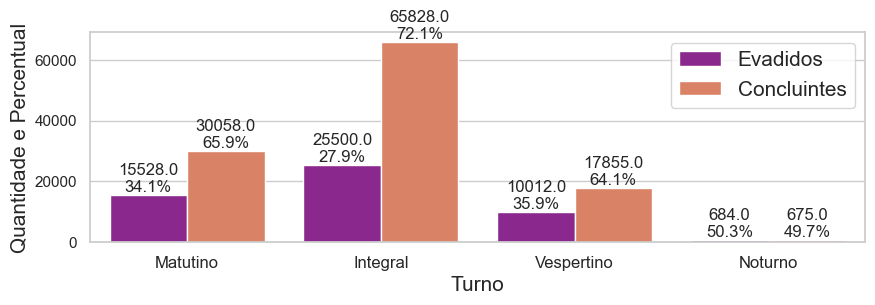

In [147]:
plt.figure(figsize=(10, 6))
show_bars(211, 'Turno', 'Categoria da Situação', categorica)

In [148]:
evadidos_ordenados=pd.crosstab(categorica['Unidade de Ensino'], categorica['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
evadidos_ordenados=evadidos_ordenados[evadidos_ordenados['Evadidos']<1].head(20)

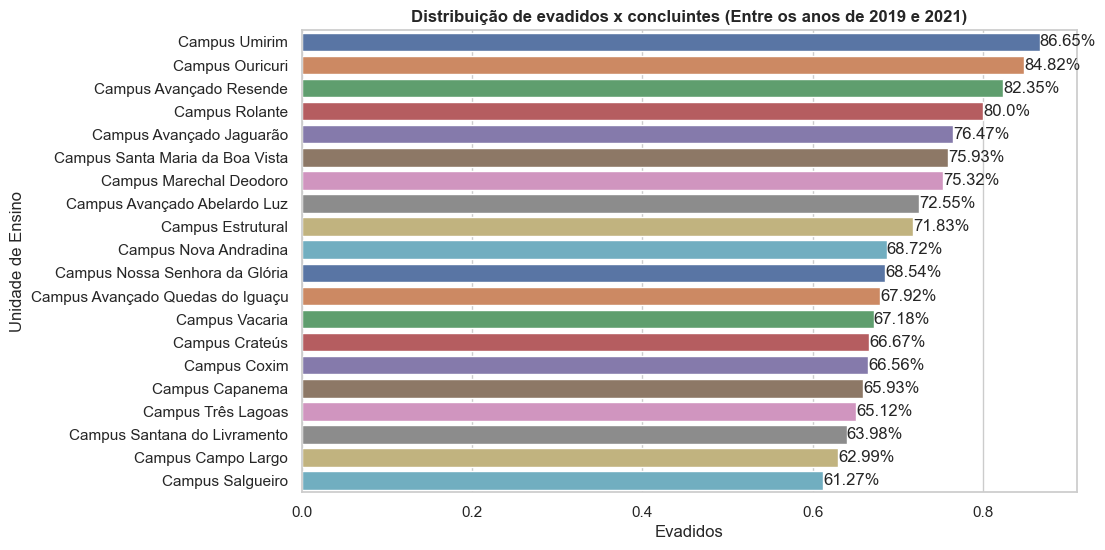

In [149]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(evadidos_ordenados,y='Unidade de Ensino',x='Evadidos', palette='deep')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

In [150]:
uf_nova=pd.crosstab(categorica['UF'], categorica['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadidos', ascending=False)
uf_nova=uf_nova[uf_nova['Evadidos']<1].head(20)

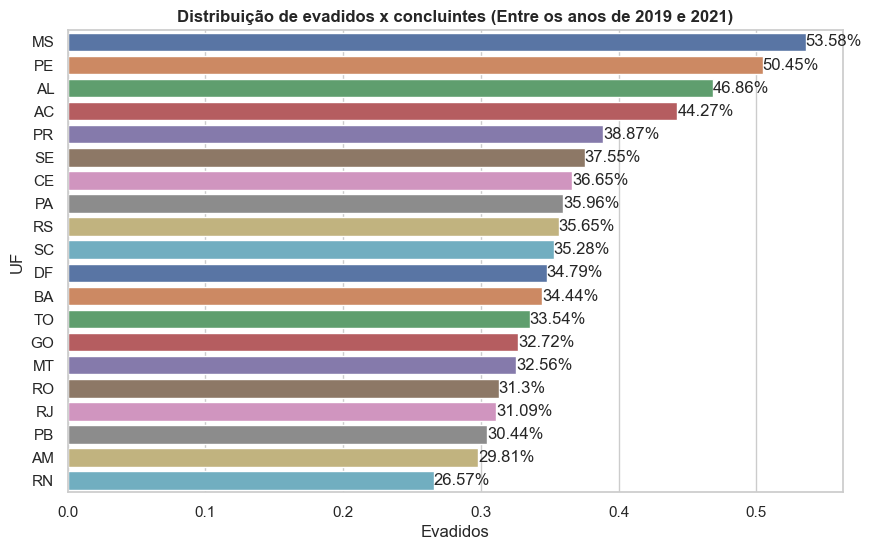

In [151]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(uf_nova,y='UF',x='Evadidos', palette='deep')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

<Axes: xlabel='Idade', ylabel='Density'>

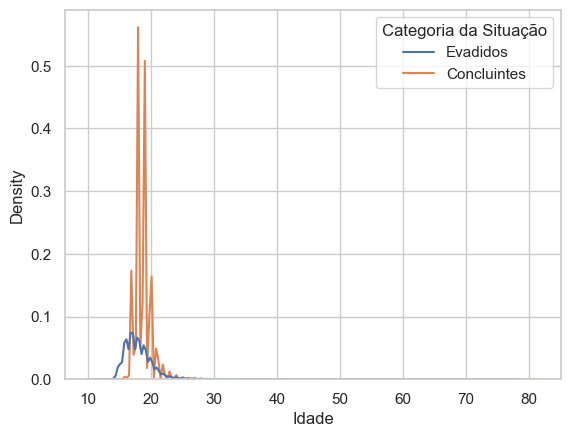

In [152]:
sns.kdeplot(data, x='Idade', hue='Categoria da Situação')

<Axes: ylabel='Idade'>

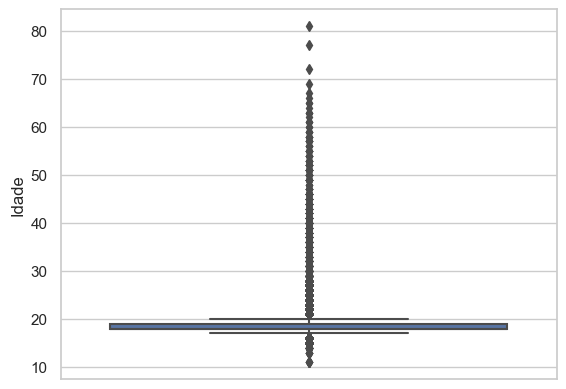

In [163]:
sns.boxplot(data, y='Idade', hue='Categoria da Situação')

In [160]:
data1=data[data['Idade']<=20]
data1.head()

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,3600,Evadidos,64095768,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.16,19.0,IFSUL,2019-07-01,Região Sul,"0<RFP<=0,5",Feminino,Matutino,RS,Campus Camaquã
1,3600,Concluintes,64094201,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.16,20.0,IFSUL,2019-08-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
2,3600,Concluintes,64094245,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.16,18.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
3,3600,Concluintes,64096104,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.16,19.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
4,3600,Concluintes,64095758,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.16,20.0,IFSUL,2019-03-01,Região Sul,"0,5<RFP<=1,0",Feminino,Matutino,RS,Campus Camaquã


<Axes: xlabel='Categoria da Situação', ylabel='Idade'>

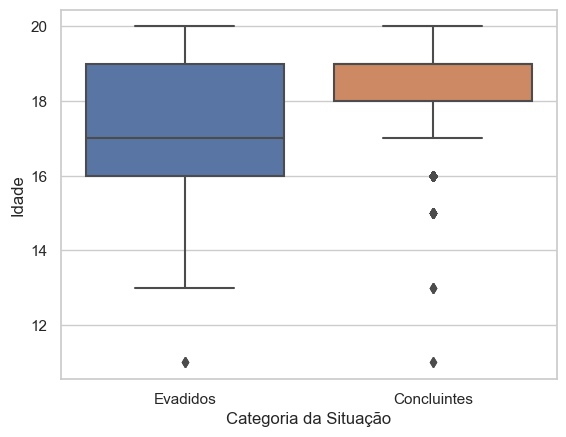

In [162]:
sns.boxplot(data1, x='Categoria da Situação', y='Idade')

## 4. Percepções


## 5. Observação